#Integrantes (el dream team)

- Juan Diego Arroyave
- Laura Daniela Colorado
- Sebastian Sánchez

#**Librerias**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
!pip install factor_analyzer
!pip install kneed
from google.colab import drive
#Para pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from kneed import KneeLocator ## para analizar número de componentes

#Para clustering
from sklearn import mixture ### modelos de clúster
from sklearn import cluster ### modelos de clúster
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score ## indicador para consistencia de clúster
from sklearn.model_selection import GridSearchCV

#**Marco de datos**

In [ ]:
#Subir la base de datos y visualizarla
ruta_archivo = 'https://raw.githubusercontent.com/juancamiloespana/LEA2/master/_data/credit_card_clients.csv'
df = pd.read_csv(ruta_archivo)
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.000000,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.000000,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,232.457717,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,530.293538,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,4.136829,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df=df.drop(columns={'CUST_ID',}) #elimina columna CUST_ID

In [ ]:
df.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.000000,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.000000,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,232.457717,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,530.293538,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,4.136829,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
print(f'Cantidad total de nulos: {df.isnull().sum().sum()}')

Cantidad total de nulos: 314


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**Se toma la decisión de eliminar los datos nulos ya que no representan un gran porcentaje dentro del total de datos**

#**Reducción de dimensionalidad (PCA)**


In [ ]:
df = df.drop(columns=['BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']) #eliminar variables binarias
sc= StandardScaler().fit(df) #estandarizar variables
df_sc=sc.transform(df)

In [ ]:
df.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,95.40,0.000000,95.40,0.000000,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.00,0.000000,0.00,6442.945483,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,773.17,232.457717,0.00,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,16.00,4.136829,0.00,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1333.28,0.000000,1333.28,0.000000,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


Se establece un PCA igual a 13, dado que luego de eliminar las variables categoricas, se tiene un total de 13 variables en el marco de datos

In [ ]:
pca=PCA(n_components=13) ## se puede dar valor de componentes o varianza explicada
pca.fit(df_sc)

PCA(n_components=13)

In [ ]:
pca.components_ ## lambdas, vectores propios pesos de observadas sobre latentes
pca.explained_variance_ ## valores propios alpha, cuánta varianza es explicada
ve=pca.explained_variance_ratio_ ### procentaje de variable explicada por cada componente
ve

array([0.28199576, 0.23635658, 0.09650748, 0.07518671, 0.0656364 ,
       0.06136612, 0.05452069, 0.04144721, 0.02730906, 0.02183432,
       0.01714769, 0.01351487, 0.00717712])

In [ ]:
pca.components_ ## lambdas, vectores propios pesos de observadas sobre latentes
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.296591,0.423230,0.336117,0.326459,0.204887,0.124309,0.156123,0.349393,0.334320,0.410763,0.150385,0.027733,0.074812
1,0.300338,-0.262117,-0.202201,-0.235370,0.426691,0.468103,0.439647,-0.249931,0.069316,0.030288,0.111050,-0.253591,-0.074190
2,0.351199,-0.080513,-0.133211,0.026503,-0.189103,-0.209145,-0.243161,0.016952,0.126163,-0.193635,0.536891,-0.438886,0.422526
3,0.051118,0.123904,0.079712,0.172080,-0.121655,0.079423,-0.029992,0.144518,-0.318015,-0.158204,0.360149,-0.269666,-0.758015
4,0.060381,-0.172120,-0.411482,0.189297,0.112961,-0.107510,-0.060714,-0.060051,0.250108,-0.000964,0.434027,0.663399,-0.197320
5,0.255280,-0.006884,0.265489,-0.398737,0.005837,-0.207882,-0.344360,-0.257677,0.540964,0.026063,-0.159770,-0.052747,-0.394269
6,-0.174115,0.068011,0.449305,-0.436179,0.057333,-0.043059,0.028605,-0.254005,-0.317983,0.253135,0.520784,0.219037,0.134421
7,-0.131790,-0.003410,-0.285099,0.208698,0.367751,-0.316851,-0.278107,-0.239884,-0.187194,0.591155,-0.043784,-0.308599,-0.074860
8,-0.096238,0.232585,0.064701,0.414936,-0.366919,0.202450,0.127857,-0.734004,0.161784,-0.000523,0.030052,-0.040755,0.028641
9,-0.701174,-0.080258,-0.053565,-0.097361,-0.038047,-0.072372,0.256109,0.181512,0.492869,0.046062,0.230143,-0.285186,-0.070731


In [ ]:
l = pca.transform(df_sc) ## variables latentes
pd.DataFrame(l)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.637139,-0.573513,0.349368,-0.076337,-0.631487,-0.287088,0.177338,0.425328,0.024821,0.016366,-0.161426,0.116452,0.023604
1,0.775552,2.073561,-0.266350,-1.116753,0.704127,0.540826,0.301576,1.024373,-0.659234,-0.352792,-0.794769,-0.548544,0.138251
2,-0.209155,-0.323991,0.982905,-0.414176,-0.319742,1.006597,-0.269146,-0.238331,-0.025661,0.156379,-0.028166,0.231562,-0.006230
3,-1.495473,-0.406190,0.476968,-0.112203,-0.590798,-0.111506,0.216732,0.446654,-0.022748,-0.193466,-0.004136,0.212260,-0.028180
4,-0.235130,-0.713152,1.100697,0.513853,0.031494,-0.698786,-0.047481,0.697302,0.525431,-0.362828,-0.206592,0.195747,-0.095271
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,-2.115319,-0.213143,-1.621915,3.401836,0.203194,1.499224,-0.367207,0.753354,-0.149275,0.278002,0.108626,0.525997,-0.086554
8632,-1.759375,-0.780279,-2.355004,2.988036,1.389618,1.307509,-0.203604,0.280849,-0.182707,-0.143087,0.136141,0.503511,-0.107927
8633,-1.910620,-0.502660,-1.961108,3.192194,0.819621,1.421438,-0.326658,0.467702,-0.200584,0.112462,0.112216,0.504024,-0.093314
8634,-1.961055,0.110260,-2.232678,3.223703,0.669459,1.191000,-0.202454,0.167723,0.040256,0.043701,0.324502,0.169454,-0.083660


<ipython-input-38-70e47d0f3181>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=np.arange(1,14), y=np.cumsum(ve), palette="viridis")


<Axes: >

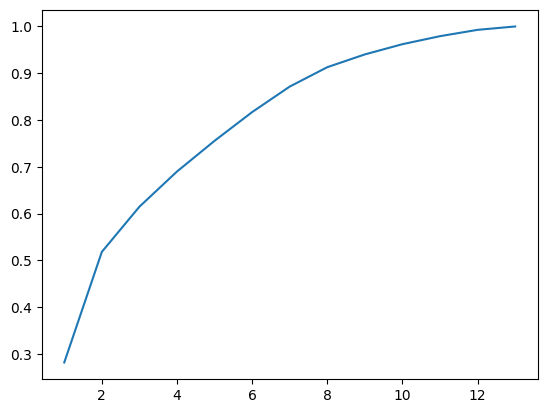

In [ ]:
# analizar número de componentes con regla del codo
sns.lineplot(x=np.arange(1,14), y=np.cumsum(ve), palette="viridis")

In [ ]:
#valor analitico # de componentes
kl=KneeLocator(x=np.arange(1,14), y=np.cumsum(ve),curve="concave", direction="increasing")
print('El valor es:',kl.elbow)

El valor es: 6


**Se escoge un total de 6 componentes ya que estos explican aproximadamente el 80% de la varianza.**

Dado el valor de componentes:

In [ ]:
pca=PCA(n_components=6)
pca.fit(df_sc)

PCA(n_components=6)

Valores propios

In [ ]:
vp = pd.DataFrame(pca.components_)
vp.columns = [i for i in df.columns]
vp

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.296591,0.423230,0.336117,0.326459,0.204887,0.124309,0.156123,0.349393,0.334320,0.410763,0.150385,0.027733,0.074812
1,0.300338,-0.262117,-0.202201,-0.235370,0.426691,0.468103,0.439647,-0.249931,0.069316,0.030288,0.111050,-0.253591,-0.074190
2,0.351199,-0.080513,-0.133211,0.026503,-0.189103,-0.209145,-0.243161,0.016952,0.126163,-0.193635,0.536891,-0.438886,0.422526
3,0.051118,0.123904,0.079712,0.172080,-0.121655,0.079423,-0.029992,0.144518,-0.318015,-0.158204,0.360149,-0.269666,-0.758015
4,0.060381,-0.172120,-0.411482,0.189297,0.112961,-0.107510,-0.060714,-0.060051,0.250108,-0.000964,0.434027,0.663399,-0.197320
5,0.255280,-0.006884,0.265489,-0.398737,0.005837,-0.207882,-0.344360,-0.257677,0.540964,0.026063,-0.159770,-0.052747,-0.394269


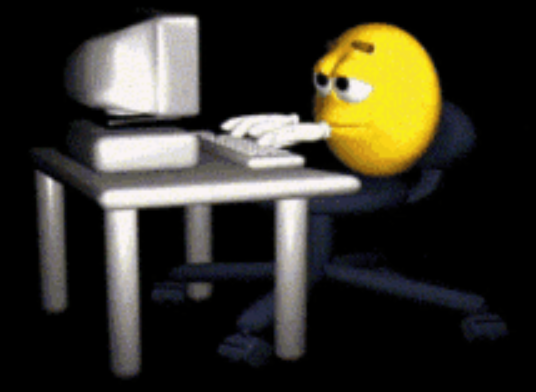

**Nota: Para identificar la representación de las variables originales por las latentes, se tendrá en cuenta un valor superior a 0,3.**

- La primer variable latente encontrada, representa un total de 6 variables originales:
  - PURCHASES
  - ONEOFF_PURCHASES
  - INSTALLMENTS_PURCHASES
  - PURCHASES_TRX
  - CREDIT_LIMIT
  - PAYMENTS

- La segunda variable latente econtrada, representa un total de 4 variables originales:
  - BALANCE
  - CASH_ADVANCE
  - CASH_ADVANCE_FREQUENCY
  - CASH_ADVANCE_TRX

- La tercer variable latente encontrada, representa un total de 4 variables originales:
  - BALANCE
  - MINIMUM_PAYMENTS
  - PRC_FULL_PAYMENT
  - TENURE

- La cuarta variable latente encontrada, representa un total de 3 variables originales:
  - CREDIT_LIMIT
  - MINIMUM_PAYMENTS
  - TENURE

- La quinta variable latente encontrada, representa un total de 3 variables originales:
  - ONEOFF_PURCHASES
  - MINIMUM_PAYMENTS
  - PRC_FULL_PAYMENT

- La sexta variable latente encontrada, representa un total de 4 variables originales:
  - INSTALLMENTS_PURCHASES
  - CASH_ADVANCE_TRX
  - CREDIT_LIMIT
  - TENURE


In [ ]:
l_sel=l[:,0:6]

<Axes: >

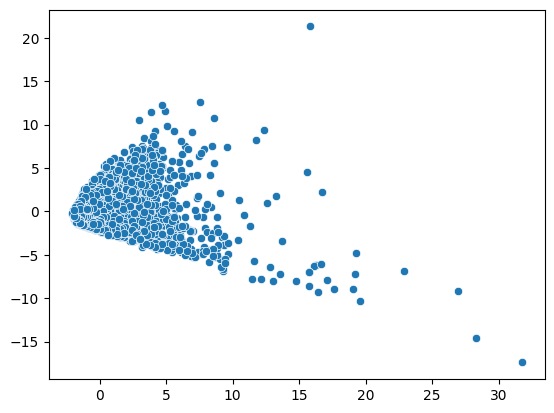

In [ ]:
sns.scatterplot(x=l_sel[:,0], y=l_sel[:,1])

*Las dos variables latentes, que consideramos más importantes y se utilizaron para el anterior gráfico explican apróximadamente el 51,82% de la varianza.*

#**Clusters**

- En un principio, se descarta aplicar clustering mediante DBscan porque si bien se cumple la caracteristica de densidad en los datos, no se cumple con la separación necesaria entre clusters.

- Se decide no aplicar clustering mediante GMM ya que no logramos observar que en los datos se pueda realizar una distinción por distribuciones.

- Por tanto, se decide aplicar clustering mediate KMeans por la simplicidad. Su estrategia de centoides nos permite diferenciar de manera efectiva un conjunto de datos que se encuentra muy agrupado.


##**KMeans**


In [ ]:
l_sel = pd.DataFrame(l_sel)

**Se decide establecer un total de 3 clusters ya que el contexto del problema lo indica**

<Axes: xlabel='0', ylabel='1'>

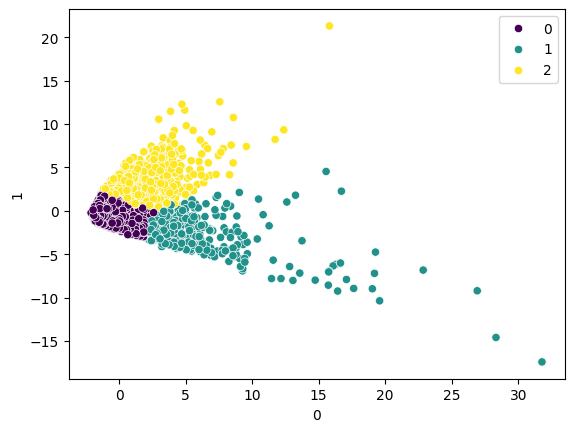

In [ ]:
n = 3 ##Cantidad de clusters
kmeans=cluster.KMeans(n_clusters=n, n_init=10)
kmeans.fit(l_sel)

cluster_label=kmeans.labels_ ### ver los cluster de cada fila
centroides= kmeans.cluster_centers_ ### valores de los centroides

sns.scatterplot(x=0, y=1, hue=cluster_label, data=l_sel, palette='viridis')

**Se agregan las etiquetas de los cluster al marco de datos original para hacer la respectiva descripción.**

In [ ]:
df['CLUSTER'] = cluster_label
df.head(5)

In [ ]:
#Primer cluster
df1 = df[df['CLUSTER'] == 0]
df1.describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
count,6732.000000,6732.000000,6732.000000,6732.000000,6732.000000,6732.000000,6732.000000,6732.000000,6732.000000,6732.000000,6732.000000,6732.000000,6732.000000,6732.0
mean,918.392719,718.156915,94.189692,324.622090,343.277845,0.072660,1.294266,11.873737,3631.324062,1104.915253,557.188959,0.176953,11.544712,0.0
std,1082.714441,901.960548,197.598877,500.320372,672.100573,0.114111,2.292141,14.541559,2948.855698,1208.178685,1328.483591,0.308617,1.297378,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.049513,0.019163,0.000000,6.000000,0.0
25%,86.101872,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,349.518890,154.160360,0.000000,12.000000,0.0
50%,525.158613,378.195000,1.813827,109.680000,0.000000,0.000000,0.000000,8.000000,2500.000000,688.947050,222.694214,0.000000,12.000000,0.0
75%,1374.636937,1010.290000,92.496167,450.000000,365.520166,0.100000,2.000000,16.000000,5000.000000,1409.464631,528.928034,0.200000,12.000000,0.0
max,8115.039014,7311.990000,1782.690464,4249.920000,5452.074197,0.666667,23.000000,186.000000,25000.000000,16842.391870,28483.254830,1.000000,12.000000,0.0


In [ ]:
#Segundo cluster
df2 = df[df['CLUSTER'] == 1]
df2.describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
count,431.000000,431.00000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.0
mean,3334.119740,7466.44580,1265.484508,2643.259072,532.271028,0.060884,1.612529,86.250580,9550.464037,7081.881732,1971.229661,0.300323,11.932715,1.0
std,3295.210502,5896.40629,1668.658197,2651.281436,1690.676077,0.141237,4.824427,56.676867,4811.892947,6789.757968,5103.911034,0.396728,0.508186,0.0
min,4.382924,130.24000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,92.865469,29.259869,0.000000,6.000000,1.0
25%,807.147800,4466.22500,300.147809,1056.315000,0.000000,0.000000,0.000000,49.000000,6000.000000,3540.448132,234.789235,0.000000,12.000000,1.0
50%,2306.698723,5708.18000,854.119740,1976.270000,0.000000,0.000000,0.000000,74.000000,9000.000000,4974.329762,671.845831,0.083333,12.000000,1.0
75%,4894.342134,8394.49500,1582.149242,3293.360000,99.621371,0.083333,1.000000,109.000000,12000.000000,8161.333958,1853.614523,0.750000,12.000000,1.0
max,19043.138560,49039.57000,15668.516291,22500.000000,19513.474830,1.000000,48.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,1.0


In [ ]:
#Tercer cluster
df3 = df[df['CLUSTER'] == 2]
df3.describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.0
mean,4214.903450,545.129973,78.721925,210.321914,4104.103563,0.456864,13.042091,8.634759,7121.829291,3340.239209,1944.019981,0.037378,11.370672,2.0
std,2716.768595,929.185622,190.021933,452.258988,3438.364006,0.224700,11.630737,15.572880,3771.750998,4095.903050,3922.307339,0.106246,1.495376,0.0
min,36.979201,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,46.969049,16.950090,0.000000,6.000000,2.0
25%,2101.047620,0.000000,0.000000,0.000000,2035.862807,0.250000,6.000000,0.000000,4150.000000,1087.866649,646.375050,0.000000,12.000000,2.0
50%,3767.229899,90.010000,0.000000,0.000000,3298.958165,0.416667,10.000000,1.000000,6500.000000,1865.526860,1198.874608,0.000000,12.000000,2.0
75%,5825.287700,711.720000,62.383750,200.000000,5105.254316,0.583333,16.000000,11.000000,9000.000000,3898.309616,1952.041626,0.000000,12.000000,2.0
max,16304.889250,7194.530000,1683.547837,3887.000000,47137.211760,1.500000,123.000000,142.000000,21500.000000,39048.597620,61031.618600,1.000000,12.000000,2.0


##**Diferencias de clusters**

**Cupo disponible:**
En promedio los clientes del primer cluster tienen un cupo de 918, los del segundo cluster de 3334 y los del tercero de 4214. Al comparar dichos cupos con el importe promedio de las compras, se concluye que quienes tienen mayor cupo no son necesariamente los que más gastan, para dicha variable el orden es el siguiente:

*Cluster3 (545), Cluster1 (718), Cluster2 (7466).*




**Porcentaje del pago total abonado por el asuario:**
En promedio los usuarios del primer cluster tienen un porcentaje de pago total abonado aproximadamente del 17%, los usuarios del segundo cluster tiene un porcentaje de pago total abonado aproximadamente del 30% y los usuarios del tercer cluster tienen un porcentaje de pago total abonado aproximadamente del 3%.

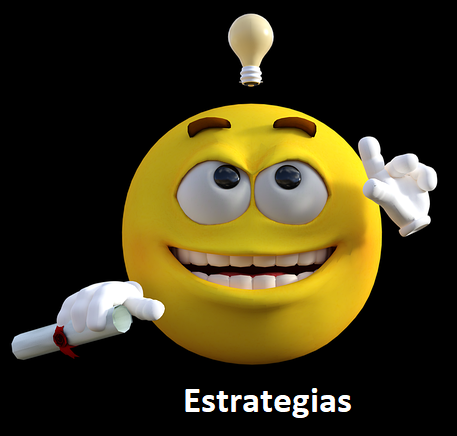

#**Estrategias**


- Para el cluster 1, se propone la estrategia de aumentar gradualmente el límite del crédito ya que demuestran un buen comportamiento de pago y un alto nivel de gasto. Esto les dará más flexibilidad financiera y puede incentivarles a utilizar más su tarjeta de crédito.

- Para el cluster 2, se propone la estrategia de acumular puntos, generar reembolsos en efectivo y generar ofertas basados en el tipo de producto que más frecuentan a la hora de hacer compras. Esto, dado que son los clientes que más uso hace de la tarjeta, tiene una buena tasa de compra y mejor procentaje de pago total tienen.

- Para el cluster 3, se propone la estrategia de analizar las pocas compras que realizar en un periodo y generar ofertas personalizadas según dicho comportamiento. Además, se propone una reducción en las tasas de interés con el fin de aumentar el porcentaje de pago total ya que son los clientes que menor porcentaje de pago total acumulado tienen.

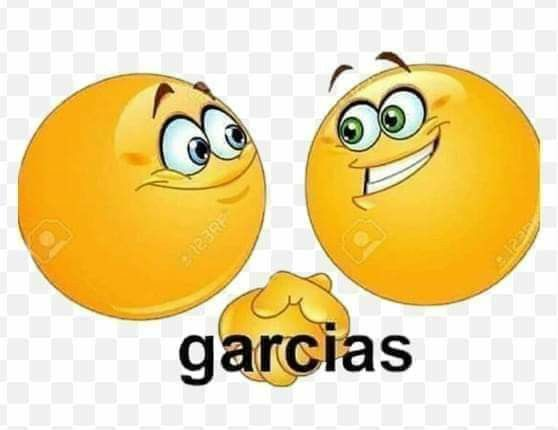